# K-Means Clustering — Customer Segmentation
**Author:** Telugu Rakesh

This notebook demonstrates K-Means clustering for a simple customer-segmentation example.
It includes: data generation, the Elbow Method to pick k, 2D cluster visualization with centroids, and an optional 3D view.


In [1]:
# Step 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting (optional)


## Step 2 — Generate sample customer data (synthetic)
We'll create a 2D blob dataset to simulate customer features. Setting `random_state` makes the example reproducible.

In [2]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
pd.DataFrame(X, columns=['feature_1', 'feature_2']).head()

,feature_1,feature_2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


## Step 3 — Visualize the raw data (2D)

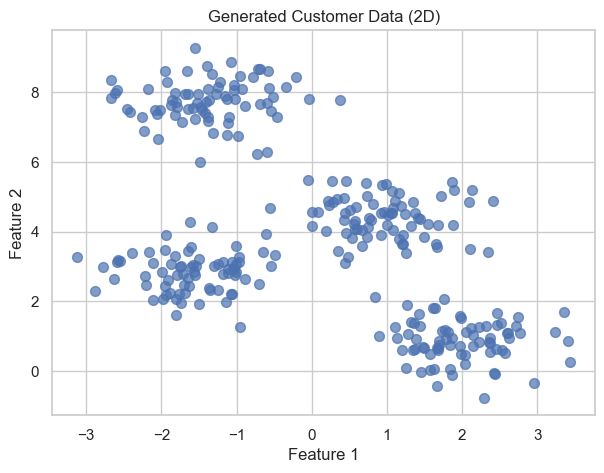

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
plt.title("Generated Customer Data (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Step 4 — Elbow Method to determine optimal k
We'll compute WCSS (within-cluster sum of squares) for k=1..10 and look for the elbow.
Note: we set `n_init=10` to avoid sklearn warnings on some versions.

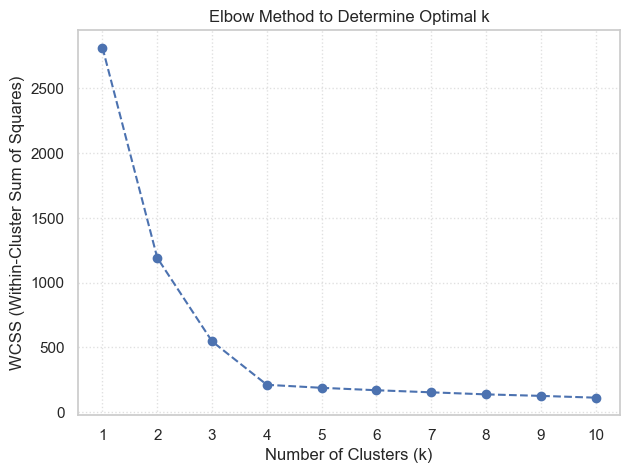

In [4]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b')
plt.xticks(K_range)
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

From the Elbow plot you can pick the `k` at the elbow (bend). For our synthetic data we expect 4 clusters (we generated with centers=4).
Set `k_optimal` accordingly below.

In [5]:
# Step 5: Fit K-Means with the chosen k
k_optimal = 4  # change if you pick a different k from the Elbow plot
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster assignment to a DataFrame (useful for further analysis)
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['cluster'] = y_kmeans
df.head()

,feature_1,feature_2,cluster
0,0.836857,2.136359,0
1,-1.413658,7.409623,2
2,1.155213,5.099619,1
3,-1.018616,7.814915,2
4,1.271351,1.892542,0


## Step 6 — Visualize clusters (2D) with centroids
Plot each cluster with a different color and mark centroids.

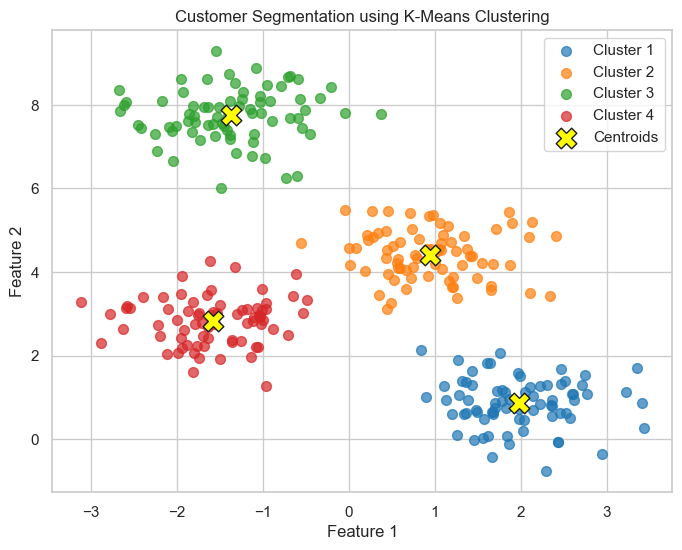

In [6]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette('tab10', n_colors=k_optimal)
for i in range(k_optimal):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=50, color=palette[i], label=f'Cluster {i+1}', alpha=0.7)

# Centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=220, c='yellow', edgecolor='k', marker='X', label='Centroids')

plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Step 7 — 3D visualization (optional)
We can show cluster ids as a 3rd axis to provide another perspective. This is primarily illustrative for this synthetic 2D data.

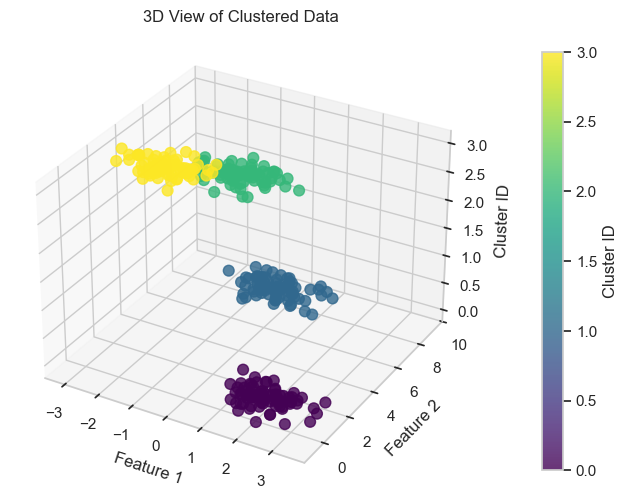

In [7]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X[:, 0], X[:, 1], y_kmeans, c=y_kmeans, cmap='viridis', s=60, alpha=0.8)
ax.set_title('3D View of Clustered Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Cluster ID')
fig.colorbar(p, ax=ax, fraction=0.03, pad=0.1, label='Cluster ID')
plt.show()

---
### Notes and next steps
- This notebook uses synthetic data for demonstration. For real customer segmentation, replace the data generation step with your customer dataset (e.g., RFM features, recency/frequency/monetary, demographics).
- Try scaling features (StandardScaler) when features have different ranges before applying K-Means.
- Evaluate cluster stability and business meaning, then profile clusters (average metrics per cluster).


### Optional: Install requirements (run in a notebook cell if needed)
If required packages are not installed in your environment, run the cell below.

In [ ]:
# !pip install scikit-learn matplotlib seaborn  # uncomment and run if packages are missing